In [3]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!nvidia-smi

!pip install ultralytics

Sun Mar 23 09:48:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Database1.zip'  # 압축 파일 경로
extract_path = '/content/drive/MyDrive/dataset'  # 압축 해제 경로 (Google Drive 내부)

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"데이터셋이 {extract_path} 에 성공적으로 압축 해제되었습니다!")


데이터셋이 /content/drive/MyDrive/dataset 에 성공적으로 압축 해제되었습니다!


In [10]:
import os
import shutil

# 데이터셋 경로 설정
base_path = '/content/drive/MyDrive/dataset'
images_dir = os.path.join(base_path, 'images')
labels_dir = os.path.join(base_path, 'labels')

# 디렉토리 생성
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# 파일 분리 함수
def organize_files(base_path):
    for file in os.listdir(base_path):
        if file.endswith(('.jpg', '.png', '.jpeg', '.JPEG')):  # 이미지 파일 확장자
            shutil.move(os.path.join(base_path, file), os.path.join(images_dir, file))
        elif file.endswith(('.txt', '.TXT')):  # 레이블 파일 확장자
            shutil.move(os.path.join(base_path, file), os.path.join(labels_dir, file))

# 실행
organize_files('/content/drive/MyDrive/dataset/Database1')
print("이미지와 레이블 파일이 성공적으로 분리되었습니다!")


이미지와 레이블 파일이 성공적으로 분리되었습니다!


In [12]:
import os

# MyDrive 내부의 데이터셋 경로
images_folder = '/content/drive/MyDrive/dataset/images'
labels_folder = '/content/drive/MyDrive/dataset/labels'

# 파일 목록 가져오기 (확장자 제거)
images_files = set(os.path.splitext(f)[0] for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.JPEG')))
labels_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_folder) if f.endswith('.txt'))

# 매칭되지 않는 파일 확인
missing_in_labels = images_files - labels_files  # 이미지에는 있는데 라벨이 없는 경우
missing_in_images = labels_files - images_files  # 라벨은 있는데 이미지가 없는 경우

# 결과 출력
print(f"🟥 라벨이 없는 이미지 개수: {len(missing_in_labels)}")
print(f"🟦 이미지가 없는 라벨 개수: {len(missing_in_images)}")

# 매칭되지 않는 파일 출력
if missing_in_labels:
    print(f"❌ 라벨이 없는 이미지 파일: {list(missing_in_labels)[:5]} ...")  # 최대 5개만 출력
if missing_in_images:
    print(f"❌ 이미지가 없는 라벨 파일: {list(missing_in_images)[:5]} ...")


🟥 라벨이 없는 이미지 개수: 4
🟦 이미지가 없는 라벨 개수: 0
❌ 라벨이 없는 이미지 파일: ['1007', 'video18_1999', '10005', 'video15_487'] ...


In [11]:
# 이미지와 레이블 파일 개수 확인
num_images = len(os.listdir(images_folder))
num_labels = len(os.listdir(labels_folder))
print(f"이미지 개수: {num_images}, 레이블 개수: {num_labels}")


이미지 개수: 4014, 레이블 개수: 4010


In [13]:
import os

# 삭제할 파일 이름과 확장자를 정의
files_to_delete = ['10005.jpeg', '1007.jpeg', 'video15_487.JPEG', 'video18_1999.JPEG']

# 현재 작업 디렉토리 설정
directory = '/content/drive/MyDrive/dataset/images'

# 파일 삭제
for file_name in files_to_delete:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_name}")
    else:
        print(f"File not found: {file_name}")


Deleted: 10005.jpeg
Deleted: 1007.jpeg
Deleted: video15_487.JPEG
Deleted: video18_1999.JPEG


In [14]:
import os

new_extension = '.JPEG'

for filename in os.listdir(directory):
    old_file_path = os.path.join(directory, filename)

    if os.path.isfile(old_file_path):
        name, ext = os.path.splitext(filename)

        if ext.lower() in ['.jpeg', '.jpg', '.png']:
            new_file_path = os.path.join(directory, name + new_extension)
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {filename} -> {name + new_extension}")


Renamed: 1.JPEG -> 1.JPEG
Renamed: 10.JPEG -> 10.JPEG
Renamed: 100.JPEG -> 100.JPEG
Renamed: 1000.JPEG -> 1000.JPEG
Renamed: 1006.JPEG -> 1006.JPEG
Renamed: 101.JPEG -> 101.JPEG
Renamed: 1010.JPEG -> 1010.JPEG
Renamed: 102.JPEG -> 102.JPEG
Renamed: 103.JPEG -> 103.JPEG
Renamed: 104.JPEG -> 104.JPEG
Renamed: 105.JPEG -> 105.JPEG
Renamed: 106.JPEG -> 106.JPEG
Renamed: 107.JPEG -> 107.JPEG
Renamed: 108.JPEG -> 108.JPEG
Renamed: 109.JPEG -> 109.JPEG
Renamed: 11.JPEG -> 11.JPEG
Renamed: 110.JPEG -> 110.JPEG
Renamed: 111.JPEG -> 111.JPEG
Renamed: 112.JPEG -> 112.JPEG
Renamed: 113.JPEG -> 113.JPEG
Renamed: 114.JPEG -> 114.JPEG
Renamed: 115.JPEG -> 115.JPEG
Renamed: 116.JPEG -> 116.JPEG
Renamed: 117.JPEG -> 117.JPEG
Renamed: 118.JPEG -> 118.JPEG
Renamed: 119.JPEG -> 119.JPEG
Renamed: 12.JPEG -> 12.JPEG
Renamed: 120.JPEG -> 120.JPEG
Renamed: 122.JPEG -> 122.JPEG
Renamed: 123.JPEG -> 123.JPEG
Renamed: 124.JPEG -> 124.JPEG
Renamed: 125.JPEG -> 125.JPEG
Renamed: 126.JPEG -> 126.JPEG
Renamed: 127.J

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 데이터셋 경로 설정
base_path = '/content/drive/MyDrive/dataset'
images_dir = os.path.join(base_path, 'images')
labels_dir = os.path.join(base_path, 'labels')

# 결과 저장 경로 설정
train_images_dir = os.path.join(base_path, 'train/images')
train_labels_dir = os.path.join(base_path, 'train/labels')
val_images_dir = os.path.join(base_path, 'val/images')
val_labels_dir = os.path.join(base_path, 'val/labels')

# 디렉토리 생성 함수
def create_dirs():
    for path in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
        os.makedirs(path, exist_ok=True)

# 이미지와 레이블 파일 리스트 가져오기
def get_files():
    images = sorted([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.JPEG'))])
    labels = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])
    return images, labels

# 학습 및 검증 데이터셋 분리
def split_dataset(images, labels):
    # 이미지와 레이블 이름 매칭 확인
    image_basenames = set(os.path.splitext(f)[0] for f in images)
    label_basenames = set(os.path.splitext(f)[0] for f in labels)

    # 매칭되지 않는 파일 확인
    missing_in_labels = image_basenames - label_basenames
    missing_in_images = label_basenames - image_basenames

    if missing_in_labels or missing_in_images:
        print(f"⚠️ 라벨이 없는 이미지: {missing_in_labels}")
        print(f"⚠️ 이미지가 없는 라벨: {missing_in_images}")
        raise ValueError("이미지와 라벨이 1:1로 매칭되지 않습니다.")

    # 학습 및 검증 데이터 분리 (80% 학습, 20% 검증)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    train_labels = [f"{os.path.splitext(img)[0]}.txt" for img in train_images]
    val_labels = [f"{os.path.splitext(img)[0]}.txt" for img in val_images]

    return train_images, val_images, train_labels, val_labels

# 파일 이동 함수
def move_files(file_list, src_folder, dest_folder):
    for file in file_list:
        shutil.move(os.path.join(src_folder, file), os.path.join(dest_folder, file))

# 실행 흐름
create_dirs()
images, labels = get_files()
train_images, val_images, train_labels, val_labels = split_dataset(images, labels)

move_files(train_images, images_dir, train_images_dir)
move_files(val_images, images_dir, val_images_dir)
move_files(train_labels, labels_dir, train_labels_dir)
move_files(val_labels, labels_dir, val_labels_dir)

print("데이터셋이 학습용과 검증용으로 성공적으로 분리되었습니다!")


데이터셋이 학습용과 검증용으로 성공적으로 분리되었습니다!


In [16]:
yaml_content = f"""
train: {base_path}/train/images
val: {base_path}/val/images

names:
  0: drone  # 클래스 이름 (드론만 인식)
"""

yaml_path = os.path.join(base_path, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"'data.yaml' 파일이 생성되었습니다: {yaml_path}")


'data.yaml' 파일이 생성되었습니다: /content/drive/MyDrive/dataset/data.yaml


In [17]:
from ultralytics import YOLO
from IPython.display import Image, display

# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')  # Pre-trained YOLOv8 Nano 모델 로드

# 학습 시작
results = model.train(
    data=yaml_path,
    epochs=10,
    batch=16,
    imgsz=640,
    save_period=1,  # 매 Epoch마다 체크포인트 저장
    name='drone_detection',
    project='/content/drive/MyDrive/yolov8_training',  # Google Drive에 저장
)

print("모델 학습이 완료되었습니다!")

# 혼동 행렬 시각화 함수
def visualize_confusion_matrix(epoch):
    confusion_matrix_path = f'/content/drive/MyDrive/yolov8_training/drone_detection/confusion_matrix.png'
    display(Image(filename=confusion_matrix_path, width=600))
    print(f"Epoch {epoch}의 혼동 행렬을 시각화했습니다.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8_training, name=drone_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/train/labels... 3206 images, 914 backgrounds, 2 corrupt: 100%|██████████| 3208/3208 [00:56<00:00, 57.10it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/video17_295.JPEG: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/video17_295.JPEG'
train: WARNING ⚠️ /content/drive/MyDrive/dataset/train/images/video19_1900.JPEG: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/dataset/train/images/video19_1900.JPEG'


train: New cache created: /content/drive/MyDrive/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset/val/labels... 802 images, 231 backgrounds, 0 corrupt: 100%|██████████| 802/802 [00:10<00:00, 76.93it/s] 


val: New cache created: /content/drive/MyDrive/dataset/val/labels.cache
Plotting labels to /content/drive/MyDrive/yolov8_training/drone_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_training/drone_detection
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.06G      1.782      3.333      1.304          3        640: 100%|██████████| 201/201 [01:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]


                   all        802        660      0.746      0.698      0.743      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.4G      1.774      1.789      1.358          3        640: 100%|██████████| 201/201 [01:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]

                   all        802        660      0.765      0.659      0.738      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.4G      1.731      1.365      1.343          7        640: 100%|██████████| 201/201 [01:10<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]

                   all        802        660      0.788      0.765      0.814      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.4G      1.704      1.231      1.343          5        640: 100%|██████████| 201/201 [01:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.66it/s]

                   all        802        660      0.762      0.744      0.788      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.4G      1.647      1.125      1.309          0        640: 100%|██████████| 201/201 [01:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.60it/s]

                   all        802        660      0.817      0.797      0.863       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.4G      1.623      1.053        1.3          6        640: 100%|██████████| 201/201 [01:10<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]

                   all        802        660      0.812      0.767      0.842      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.4G      1.579      1.005      1.265          5        640: 100%|██████████| 201/201 [01:10<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.89it/s]

                   all        802        660       0.84       0.79      0.883      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.4G       1.55     0.9485       1.25          7        640: 100%|██████████| 201/201 [01:10<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]

                   all        802        660      0.813      0.842      0.864      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.4G      1.524     0.9099      1.225          5        640: 100%|██████████| 201/201 [01:10<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]

                   all        802        660      0.867      0.837      0.894      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.4G      1.488     0.8778      1.204          5        640: 100%|██████████| 201/201 [01:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.72it/s]

                   all        802        660      0.865      0.855      0.904      0.514



10 epochs completed in 0.228 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8_training/drone_detection/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolov8_training/drone_detection/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolov8_training/drone_detection/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]


                   all        802        660      0.864      0.853      0.903      0.514
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8_training/drone_detection
모델 학습이 완료되었습니다!


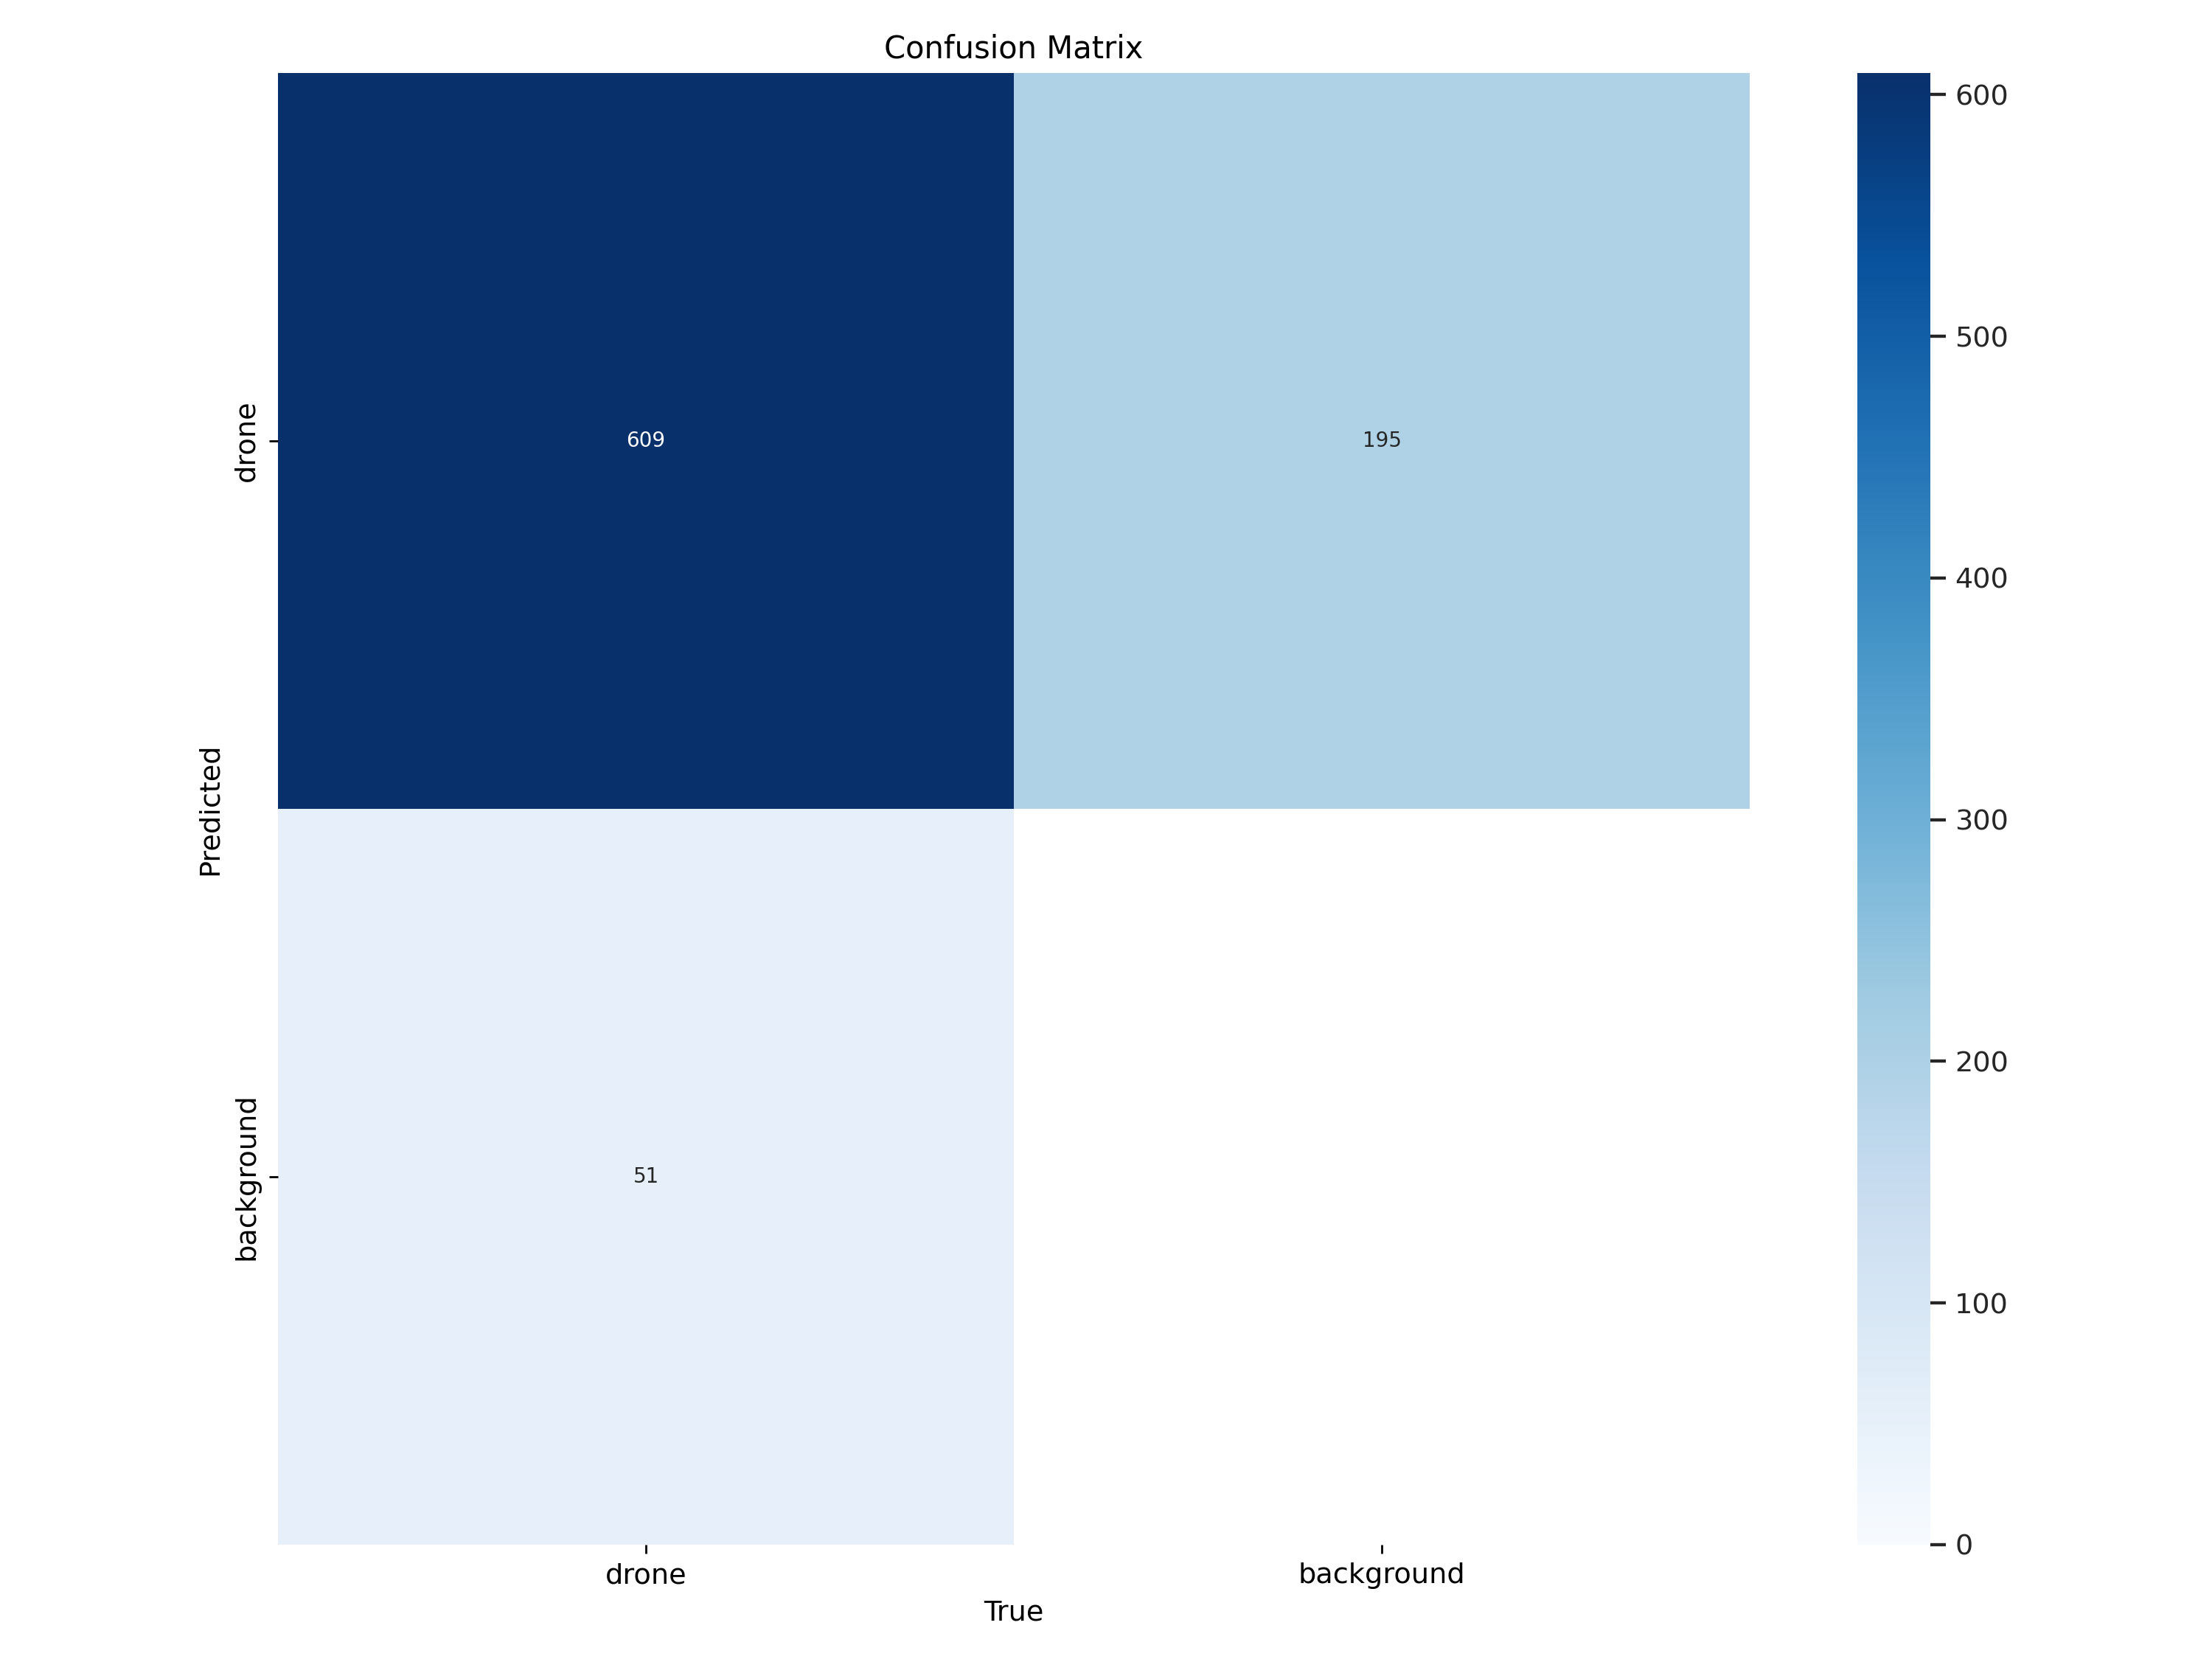

Epoch 1의 혼동 행렬을 시각화했습니다.


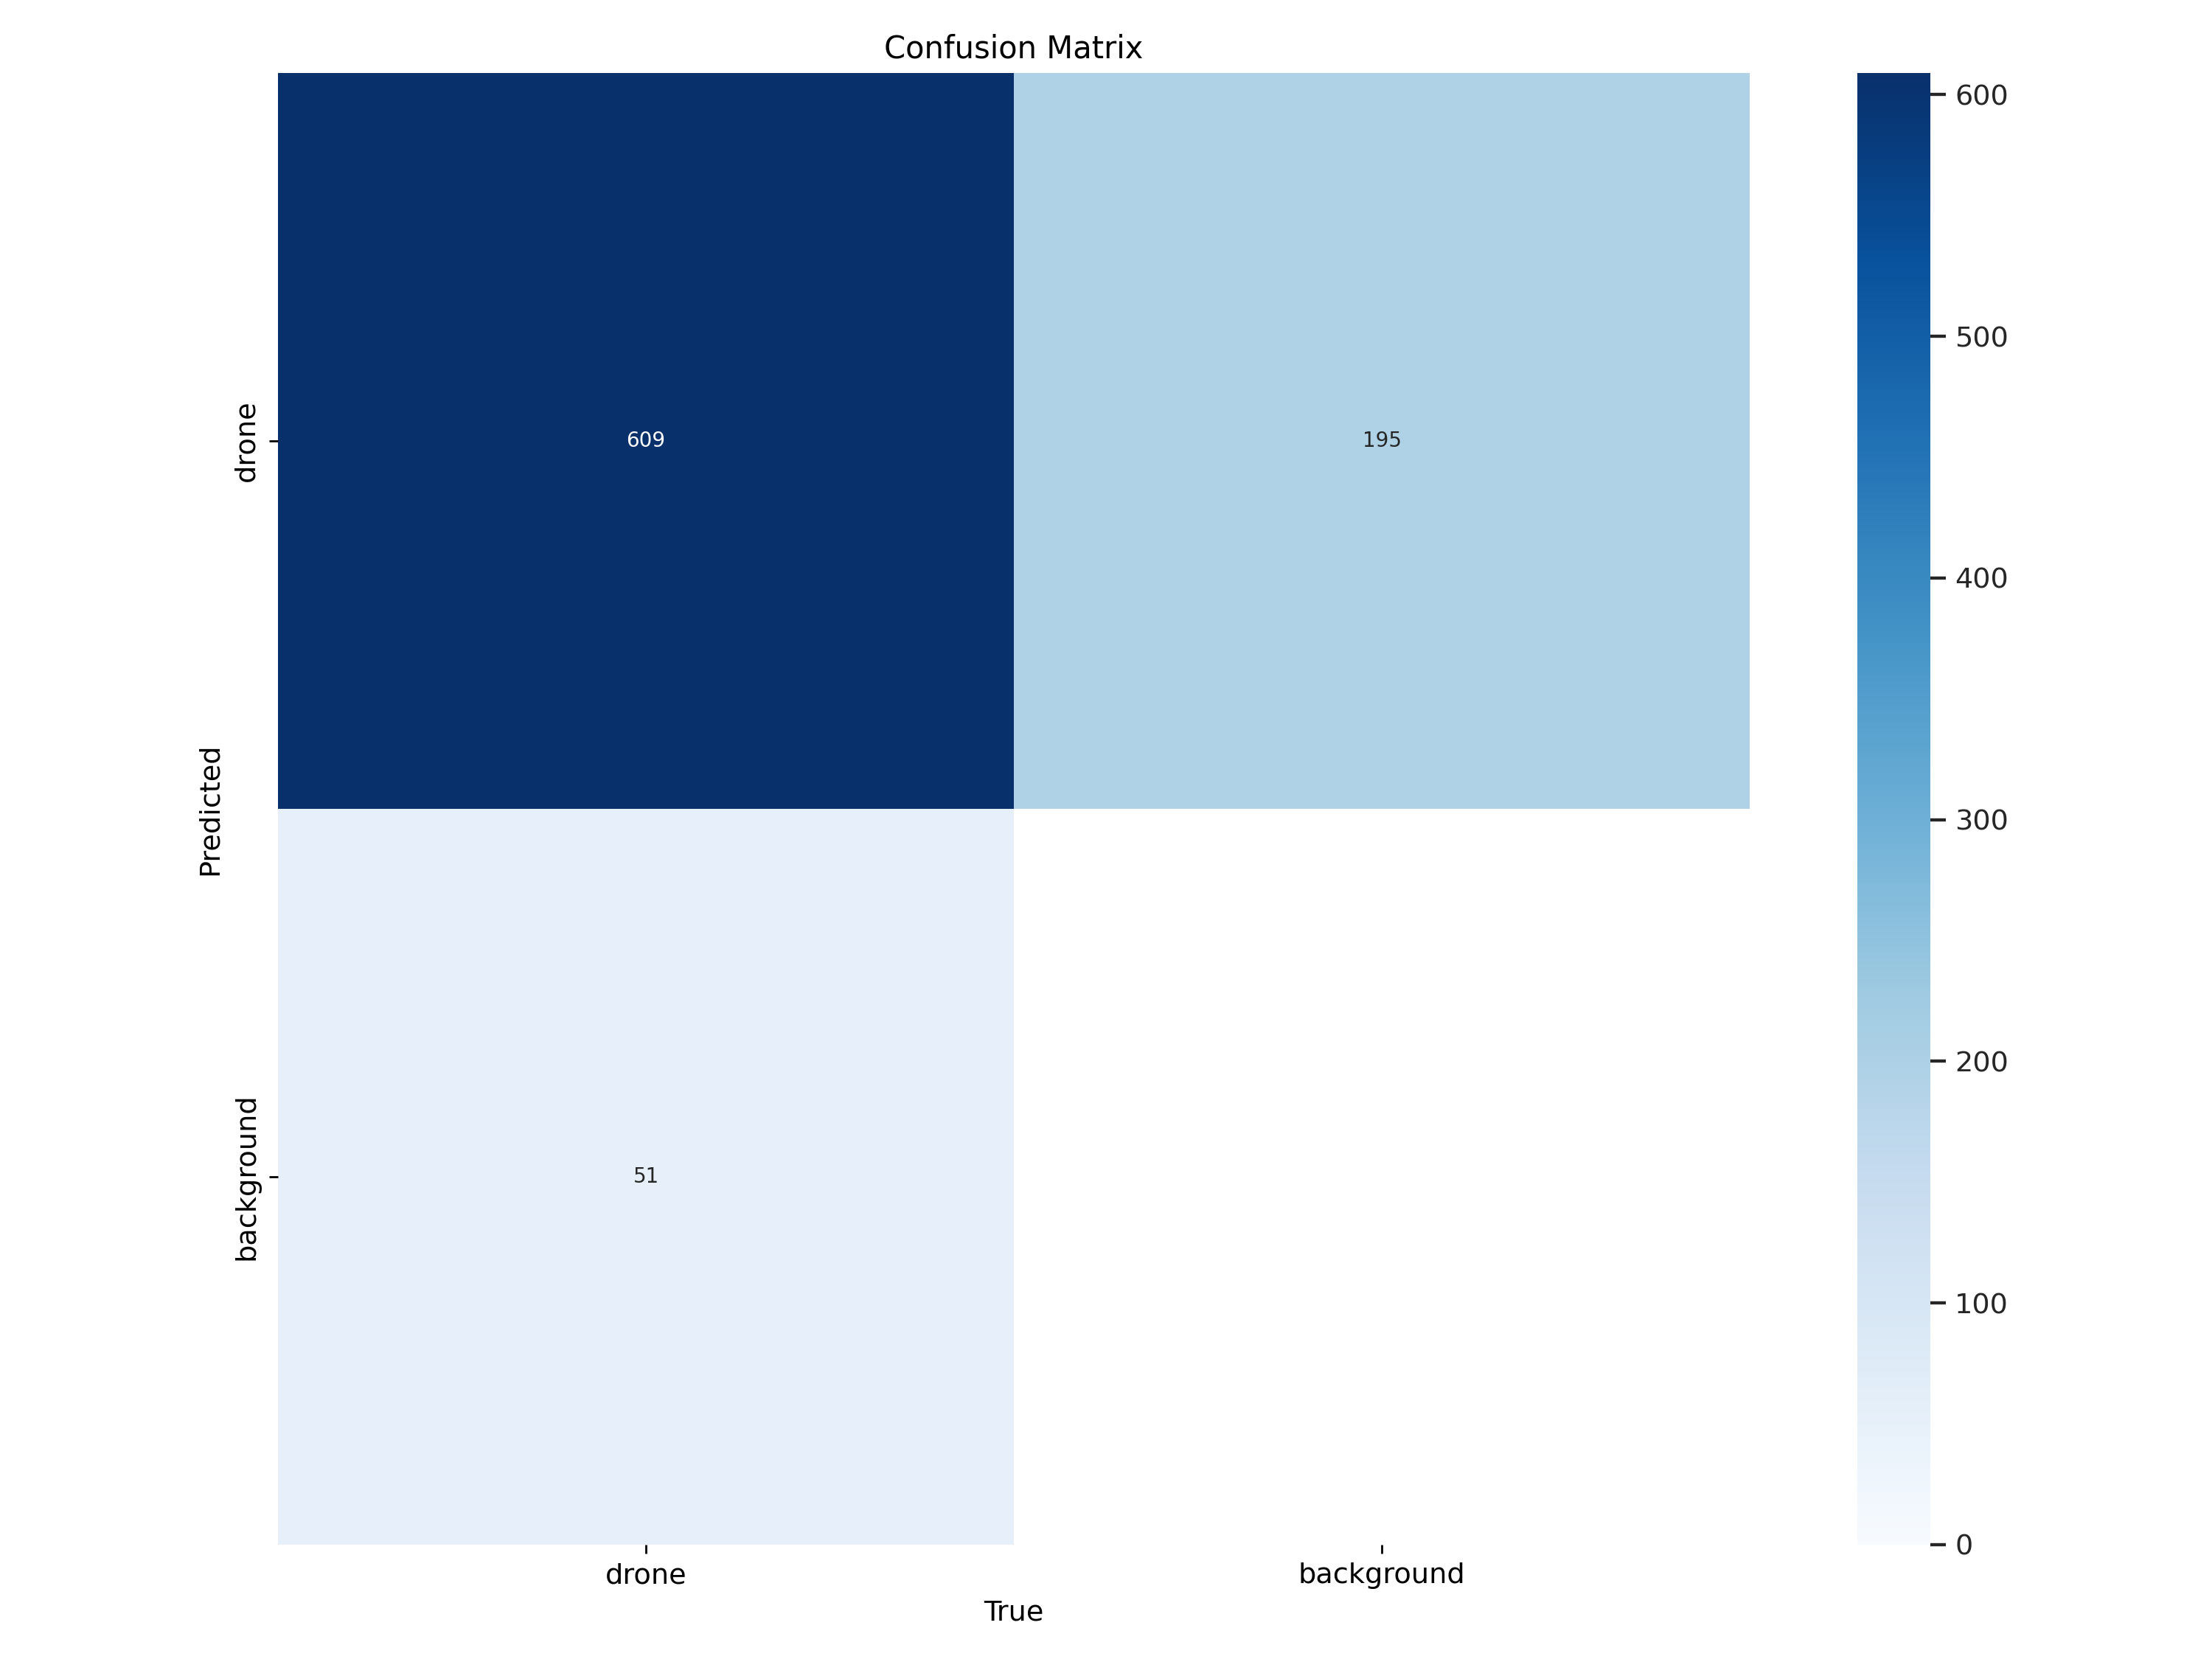

Epoch 10의 혼동 행렬을 시각화했습니다.


In [18]:
visualize_confusion_matrix(1)
visualize_confusion_matrix(10)


In [ ]:
# 이전에 저장된 모델 가중치 경로 설정
last_checkpoint = '/content/drive/MyDrive/yolov8_training/drone_detection/weights/last.pt'

# YOLOv8 모델 학습 이어하기
results = model.train(
    data=yaml_path,
    epochs=5,  # 추가로 학습할 Epoch 수
    batch=16,
    imgsz=640,
    resume=True,  # 이전 상태에서 이어서 학습
)

print("학습이 재개되었습니다!")



image 1/1 /content/drive/MyDrive/dataset/Origin.png: 352x640 1 drone, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict


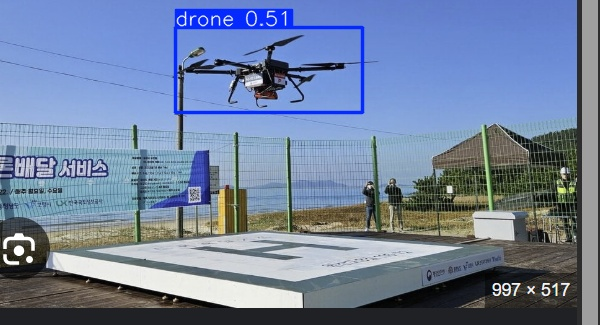

In [21]:
from ultralytics import YOLO
from IPython.display import Image, display

# 특정 이미지에 대해 객체 탐지 수행
test_results = YOLO('/content/drive/MyDrive/yolov8_training/drone_detection/weights/best.pt').predict(source='/content/drive/MyDrive/dataset/Origin.png', conf=0.25, save=True)

# 결과 저장 경로 설정
output_image_path = '/content/runs/detect/predict/Origin.jpg'

# 결과 시각화
display(Image(filename=output_image_path, width=600))


In [22]:
model.export(format='onnx', dynamic=True)  # ONNX 형식으로 내보내기

print("모델이 ONNX 형식으로 변환되었습니다!")


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov8_training/drone_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 302.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 295.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 173.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 239.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 303.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.8s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restar

In [23]:
from google.colab import files

# ONNX 파일 경로 설정
onnx_file_path = '/content/drive/MyDrive/yolov8_training/drone_detection/weights/best.onnx'

# ONNX 파일 다운로드
files.download(onnx_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>